# Clustering - Mall Customers

In [1]:
import wrangle_mall

In [2]:
from imports import *

Mall Customers notebook
- 1. Acquire data from mall_customers.customers in mysql database.

In [3]:
df = wrangle_mall.get_mall_data()
df.head()

Reading from csv file...


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- 2. Summarize data (include distributions and descriptive statistics).

In [4]:
wrangle_mall.summary_info(df)

--- Shape: (200, 5)
--- Descriptions
                customer_id  gender                  age        annual_income  \
count                200.00     200               200.00               200.00   
unique                  NaN       2                  NaN                  NaN   
top                     NaN  Female                  NaN                  NaN   
freq                    NaN     112                  NaN                  NaN   
mean                 100.50     NaN                38.85                60.56   
std                   57.88     NaN                13.97                26.26   
min                    1.00     NaN                18.00                15.00   
25%                   50.75     NaN                28.75                41.50   
50%                  100.50     NaN                36.00                61.50   
75%                  150.25     NaN                49.00                78.00   
max                  200.00     NaN                70.00               1

In [5]:
#sns.distplot(

- 3. Detect outliers using IQR.

In [6]:
q1 = df.annual_income.quantile(.25)
q3 = df.annual_income.quantile(.75)
q1, q3

(41.5, 78.0)

In [7]:
iqr = q3 - q1
# typical values for k are either 1.5 or 3; a greater value means less points will be considered outliers
k = 1.5
upper_bound = k * iqr + q3
df[df.annual_income > upper_bound]

,customer_id,gender,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
def replace_negative_with_zero(x):
    if x < 0:
        return 0
    else:
        return x

df['annual_income_outliers'] = df.annual_income - upper_bound
df.annual_income_outliers.apply(replace_negative_with_zero)

0                     0.00
1                     0.00
2                     0.00
3                     0.00
4                     0.00
              ...         
195                   0.00
196                   0.00
197                   0.00
198                   4.25
199                   4.25
Name: annual_income_outliers, Length: 200, dtype: float64

In [9]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.
    
    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)
    
    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)
        
    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

,customer_id,gender,age,annual_income,spending_score,annual_income_outliers,customer_id_outliers,age_outliers,spending_score_outliers,annual_income_outliers_outliers
0,1,Male,19,15,39,0.00,0,0,0,0.00
1,2,Male,21,15,81,0.00,0,0,0,0.00
2,3,Female,20,16,6,0.00,0,0,0,0.00
3,4,Female,23,16,77,0.00,0,0,0,0.00
4,5,Female,31,17,40,0.00,0,0,0,0.00


In [10]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
annual_income_outliers
count                   2.00
mean                    4.25
std                     0.00
min                     4.25
25%                     4.25
50%                     4.25
75%                     4.25
max                     4.25
Name: annual_income_outliers, dtype: float64
~~~
customer_id_outliers
count                   0.00
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN
Name: customer_id_outliers, dtype: float64
~~~
age_outliers
count                   0.00
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN
Name: age_outliers, dtype: float64
~~~
spending_score_outliers
count                   0.00
mean                     NaN
std                      N

- 4. Split data (train, validate, and test split).

In [12]:
train, validate, test = train, validate, test = wrangle_mall.data_split(df, 'spending_score')

train -> (112, 10)
validate -> (48, 10)
test -> (40, 10)


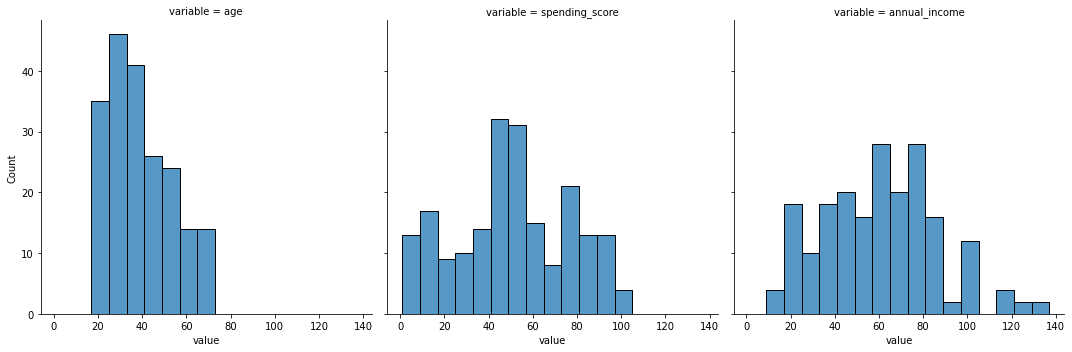

In [13]:
sns.displot(data=df[['age', 'spending_score', 'annual_income']].melt(), col='variable', x='value')

- 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

- 6. Handles missing values.

- 7. Scaling

wrangle_mall.py
- 1. Acquire data from mall_customers.customers in mysql database.
- 2. Split the data into train, validate, and split
- 3. One-hot-encoding (pd.get_dummies)
- 4. Missing values
- 5. Scaling
- 6. Add, commit, and push all of your work.